# Interim Operational Capability 1

## Set up.

### Import packages.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))

In [2]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [3]:
designs = ty.Designs("data")

In [4]:
investments = ty.Investments("data")

### Compile the production and metric functions for each technology in the dataset.

In [5]:
designs.compile()

## Examine the input data.

### The `functions` table specifies where the Python code for each technology resides.

In [6]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
PV Generic,numpy,pv_residential_generic,capital_cost,fixed_cost,production,metrics,generic residential PV


### The `indices` table defines the subscripts for variables.

In [7]:
designs.indices.drop("Offset", axis = 1)

Description Notes
Technology Type    Index                                      
PV Generic Capital BoS                 balance of system      
                   Inverter             system inverters      
                   Module                  system module      
           Fixed   System                   whole system      
           Input   Strategic         strategic materials      
           Metric  Capital                  capital cost      
                   Efficiency          module efficiency      
                   GHG              greenouse gas offset      
                   Hazardous    hazardous waste produced      
                   LCOE         levelized cost of energy      
                   Lifetime              module lifetime      
                   Strategic        strategic metal used      
                   Yield                  specific yield      
           Output  Electricity     electricity generated      
                   GHG             greenhouse gas offset      
                   Hazardous    hazardous waste produced

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [8]:
designs.designs.xs("Reference", level = "Scenario", drop_level = False)

Value            Units  \
Technology Scenario  Variable          Index                                
PV Generic Reference Input             Strategic       0         g/system   
                     Input efficiency  Strategic       1            %/100   
                     Input price       Stategic        0              $/g   
                     Lifetime          BoS             1  system-lifetime   
                                       Inverter        1  system-lifetime   
                                       Module          1  system-lifetime   
                     Output efficiency Electricity     1            %/100   
                                       GHG             1            %/100   
                                       Hazardous       1            %/100   
                     Output price      Electricity     0            $/kWh   
                                       GHG             0          $/gCO2e   
                                       Hazardous       0              $/g   
                     Scale             NaN             1    system/system   

                                                                                              Notes  
Technology Scenario  Variable          Index                                                         
PV Generic Reference Input             Strategic                                    zero by default  
                     Input efficiency  Strategic                                         no scaling  
                     Input price       Stategic                                     zero by default  
                     Lifetime          BoS                                per-lifetime computations  
                                       Inverter                           per-lifetime computations  
                                       Module                             per-lifetime computations  
                     Output efficiency Electricity  see parameter table for individual efficiencies  
                                       GHG          see parameter table for individual efficiencies  
                                       Hazardous    see parameter table for individual efficiencies  
                     Output price      Electricity                   not tracking electricity price  
                                       GHG                             not tracking hazardous waste  
                                       Hazardous                       not tracking hazardous waste  
                     Scale             NaN                                               no scaling

### The `parameters` table contains additional techno-economic parameters for each technology.

In [9]:
designs.parameters.drop("Offset", axis = 1).xs("Reference", level = "Scenario", drop_level = False)

Value      Units  \
Technology Scenario  Parameter                                              
PV Generic Reference Benchmark LCOC                    2.51977      $/Wdc   
                     Benchmark LCOE                   0.086773      $/kWh   
                     Customer Acquisition                 2000   $/system   
                     Direct Labor                         2000   $/system   
                     Discount Rate                        0.07     1/year   
                     Greenhouse Gas Offset        0.4490564e-3  gCO2e/kWh   
                     Hardware Capital                       80      $/m^2   
                     Hazardous Waste Content              1830      g/m^2   
                     Insolation                           1000      W/m^2   
                     Installer Overhead & Profit          0.35          1   
                     Inverter Capital                      0.3        $/W   
                     Inverter Efficiency                   0.9      %/100   
                     Inverter Lifetime                      16         yr   
                     Inverter Replacement                  0.5      %/100   
                     Location Capacity Factor              0.2      %/100   
                     Module Aperture                       0.9      %/100   
                     Module Capital                        110      $/m^2   
                     Module Degradation                 0.0075       1/yr   
                     Module Efficiency                   0.208      %/100   
                     Module Lifetime                        25         yr   
                     Module O&M Fixed                       20    $/kW/yr   
                     Module Soiling Loss                  0.05      %/100   
                     Permitting                            600   $/system   
                     System Size                            36        m^2   

                                                 Notes  
Technology Scenario  Parameter                          
PV Generic Reference Benchmark LCOC                     
                     Benchmark LCOE                     
                     Customer Acquisition          BCA  
                     Direct Labor                  BLR  
                     Discount Rate                  DR  
                     Greenhouse Gas Offset              
                     Hardware Capital              BCC  
                     Hazardous Waste Content            
                     Insolation                    INS  
                     Installer Overhead & Profit   BOH  
                     Inverter Capital              ICC  
                     Inverter Efficiency           IEF  
                     Inverter Lifetime             ILT  
                     Inverter Replacement          IRC  
                     Location Capacity Factor      MCF  
                     Module Aperture               MAP  
                     Module Capital                MCC  
                     Module Degradation            MDR  
                     Module Efficiency             MEF  
                     Module Lifetime               MLT  
                     Module O&M Fixed              MOM  
                     Module Soiling Loss           MSL  
                     Permitting                    BPR  
                     System Size                   SSZ

### The `results` table specifies the units of measure for results of computations.

In [10]:
designs.results

Units Notes
Technology Variable Index                           
PV Generic Cost     Cost              $/system      
           Metric   Capital             Δ$/Wdc      
                    Efficiency           %/100      
                    GHG          ΔgCO2e/system      
                    Hazardous            g/kWh      
                    LCOE                Δ$/kWh      
                    Lifetime                yr      
                    Strategic            g/kWh      
                    Yield                hr/yr      
           Output   Electricity     kWh/system      
                    GHG          ΔgCO2e/system      
                    Hazardous         g/system

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [11]:
investments.tranches

Amount Notes
Category          Tranche             Scenario                            
CIGS              CIGS 0              CIGS 0                     0.0      
                  CIGS 1              CIGS 1               1500000.0      
                  CIGS 2              CIGS 2               3000000.0      
CdTe              CdTe 0              CdTe 0                     0.0      
                  CdTe 1              CdTe 1               3000000.0      
                  CdTe 2              CdTe 2               6000000.0      
GaAs              GaAs 0              GaAs 0                     0.0      
                  GaAs 1              GaAs 1               5000000.0      
                  GaAs 2              GaAs 2               7500000.0      
InGaP             InGaP 0             InGaP 0                    0.0      
                  InGaP 1             InGaP 1              3500000.0      
                  InGaP 2             InGaP 2              9500000.0      
Perovskite        Perovskite 0        Perovskite 0               0.0      
                  Perovskite 1        Perovskite 1         7500000.0      
                  Perovskite 2        Perovskite 2         9500000.0      
Polysilicon       Polysilicon 0       Polysilicon 0              0.0      
                  Polysilicon 1       Polysilicon 1        2500000.0      
                  Polysilicon 2       Polysilicon 2        4500000.0      
Power Electronics Power Electronics 0 Polysilicon 0              0.0      
                  Power Electronics 1 Power Electronics 1  1000000.0      
                  Power Electronics 2 Power Electronics 2  5000000.0      
Soft Costs        Soft Costs 0        Polysilicon 0              0.0      
                  Soft Costs 1        Soft Costs 1         1000000.0      
                  Soft Costs 2        Soft Costs 2         5000000.0

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [12]:
investments.investments

Notes
Investment   Category          Tranche                  
High R&D     CIGS              CIGS 2                   
             CdTe              CdTe 2                   
             GaAs              GaAs 2                   
             InGaP             InGaP 2                  
             Perovskite        Perovskite 2             
             Polysilicon       Polysilicon 2            
             Power Electronics Power Electronics 2      
             Soft Costs        Soft Costs 2             
Moderate R&D CIGS              CIGS 1                   
             CdTe              CdTe 1                   
             GaAs              GaAs 1                   
             InGaP             InGaP 1                  
             Perovskite        Perovskite 1             
             Polysilicon       Polysilicon 1            
             Power Electronics Power Electronics 1      
             Soft Costs        Soft Costs 1             
No R&D       CIGS              CIGS 0                   
             CdTe              CdTe 0                   
             GaAs              GaAs 0                   
             InGaP             InGaP 0                  
             Perovskite        Perovskite 0             
             Polysilicon       Polysilicon 0            
             Power Electronics Power Electronics 0      
             Soft Costs        Soft Costs 0

## Evaluate the scenarios in the dataset.

In [13]:
scenario_results = designs.evaluate_scenarios(sample_count=500)

#### Format results as a pivot table.

In [14]:
scenario_results.xs(
    "PV Generic"
).groupby(
    ["Scenario", "Variable", "Index"]
).aggregate(
    np.mean
).xs(
    "Metric", level = 1
).pivot_table(
    index = "Scenario", columns = "Index"
)

Value                                 \
Index                     Capital Efficiency       GHG Hazardous   
Scenario                                                           
CIGS 0              -7.830449e-01   0.235286 -0.000449  0.055356   
CIGS 1              -2.177847e-01   0.264170 -0.000449  0.044636   
CIGS 2               1.180484e-01   0.274498 -0.000449  0.037853   
CdTe 0              -4.377437e-01   0.234006 -0.000449  0.054242   
CdTe 1              -9.414853e-02   0.255707 -0.000449  0.045743   
CdTe 2               2.449801e-01   0.284775 -0.000449  0.036952   
GaAs 0              -2.341127e-01   0.313429 -0.000449  0.075440   
GaAs 1              -2.371215e-02   0.312788 -0.000449  0.074366   
GaAs 2               4.609776e-01   0.344085 -0.000449  0.066284   
InGaP 0              3.878092e-01   0.403893 -0.000449  0.023526   
InGaP 1              7.390029e-01   0.409745 -0.000449  0.018454   
InGaP 2              9.542284e-01   0.397501 -0.000449  0.018085   
Perovskite 0        -1.127115e+00   0.181456 -0.000449  0.024875   
Perovskite 1        -3.770454e-01   0.225136 -0.000449  0.016882   
Perovskite 2         3.494811e-01   0.295353 -0.000449  0.008589   
Polysilicon 0        2.149637e-01   0.232702 -0.000449  0.247212   
Polysilicon 1        3.380059e-01   0.245214 -0.000449  0.204424   
Polysilicon 2        5.719297e-01   0.274613 -0.000449  0.149300   
Power Electronics 1  2.913711e-01   0.233052 -0.000449  0.235088   
Power Electronics 2  3.673993e-01   0.232552 -0.000449  0.228368   
Reference           -4.304827e-07   0.208000 -0.000449  0.275327   
Soft Costs 1         3.020633e-01   0.232917 -0.000449  0.247030   
Soft Costs 2         4.704036e-01   0.233245 -0.000449  0.246650   

                                                                     
Index                        LCOE   Lifetime Strategic        Yield  
Scenario                                                             
CIGS 0              -6.226700e-02  25.001276  0.013768   966.110562  
CIGS 1              -3.890955e-02  25.001255  0.011732   964.526771  
CIGS 2              -2.123753e-02  25.001210  0.010529   996.352654  
CdTe 0              -1.368090e-02  25.001238  0.031721  1278.374997  
CdTe 1              -2.303798e-04  25.001270  0.025570  1318.046182  
CdTe 2               1.192886e-02  25.001258  0.021686  1350.941374  
GaAs 0              -7.309584e-03  25.001206  0.007290  1278.377354  
GaAs 1              -4.767410e-04  25.001287  0.006246  1282.034911  
GaAs 2               1.509849e-02  25.001249  0.004865  1290.149410  
InGaP 0             -1.321103e-03  20.497458  0.003110  1310.567474  
InGaP 1              1.248356e-02  20.490502  0.002374  1323.855650  
InGaP 2              2.040700e-02  20.486763  0.002399  1323.882249  
Perovskite 0        -7.891168e-02  17.515680  0.007631  1335.742871  
Perovskite 1        -4.445293e-02  17.516066  0.005209  1358.978148  
Perovskite 2        -1.423276e-02  17.436788  0.003599  1359.599191  
Polysilicon 0        6.741180e-03  25.001245  0.000000  1278.375283  
Polysilicon 1        1.171625e-02  25.001261  0.000000  1297.588260  
Polysilicon 2        2.102632e-02  25.001237  0.000000  1339.017904  
Power Electronics 1  1.282510e-02  25.001209  0.000000  1342.261799  
Power Electronics 2  1.727802e-02  25.001250  0.000000  1384.528168  
Reference           -1.946058e-07  25.000000  0.000000  1278.202148  
Soft Costs 1         9.466479e-03  25.001243  0.000000  1278.377282  
Soft Costs 2         1.473357e-02  25.001280  0.000000  1278.376180

#### Print the units for the columns.

In [15]:
designs.results.loc["PV Generic", "Metric"].transpose()

Index,Capital,Efficiency,GHG,Hazardous,LCOE,Lifetime,Strategic,Yield
Units,Δ$/Wdc,%/100,ΔgCO2e/system,g/kWh,Δ$/kWh,yr,g/kWh,hr/yr
Notes,,,,,,,,


### Save results.

In [16]:
scenario_results.to_csv("output/example-scenario.csv")

### Plot the results.

/nix/store/2hqyq1p29z76wvh920r43a63sy9n1cag-python3-3.7.6-env/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


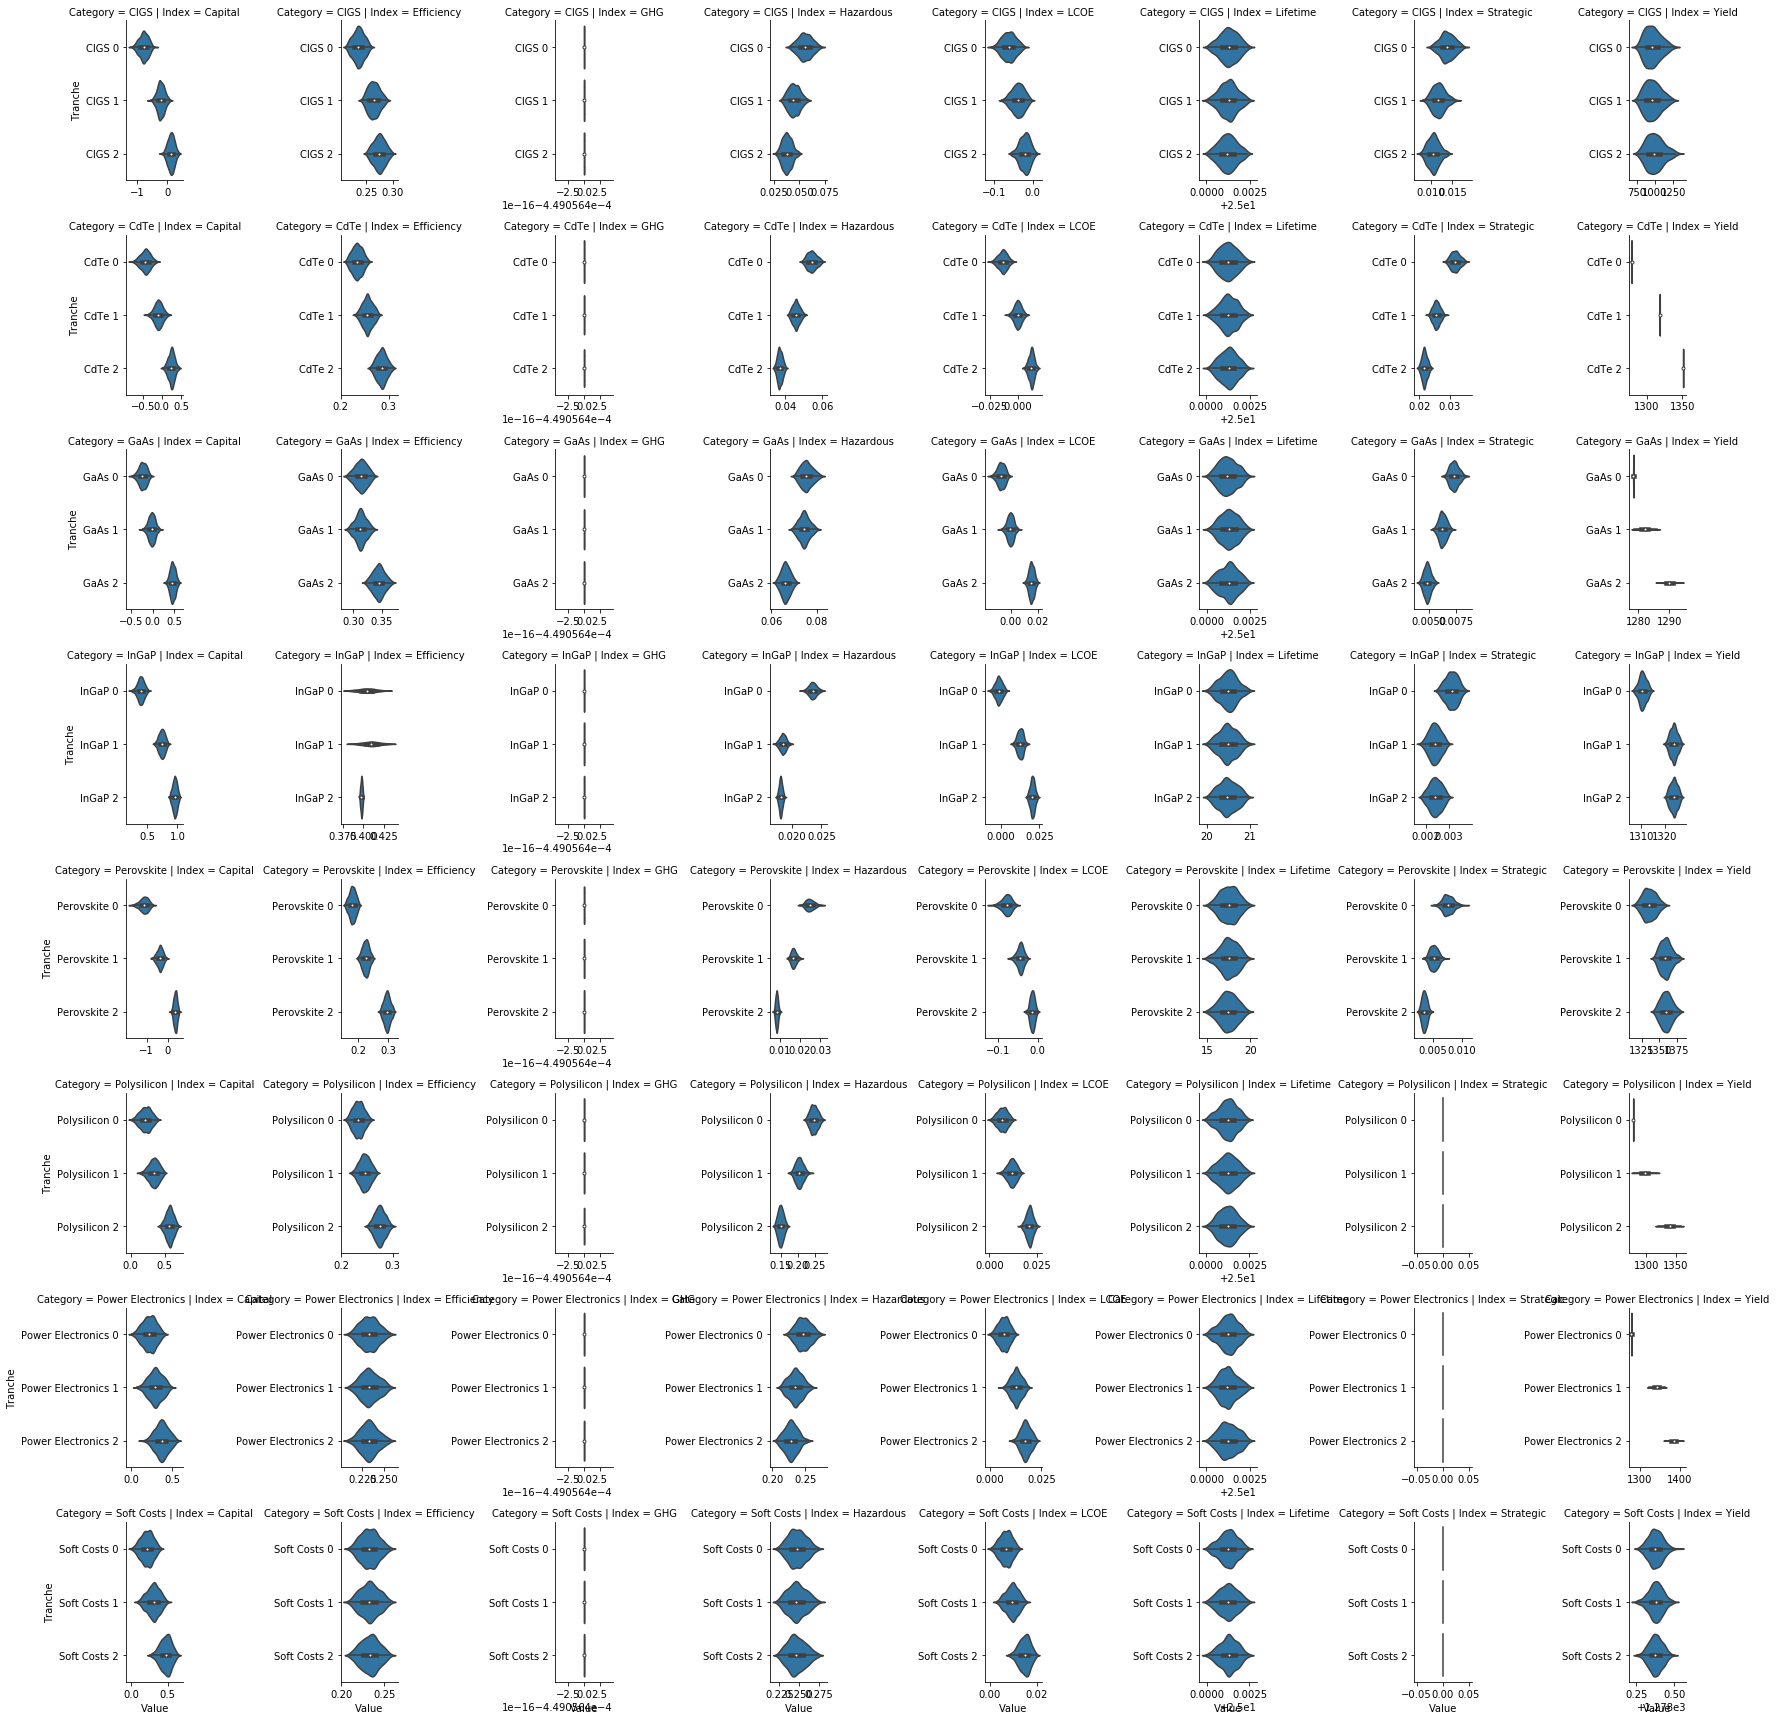

In [17]:
g = sb.FacetGrid(
    data = investments.tranches.join(scenario_results).xs("Metric", level = "Variable").reset_index(),
    row = "Category",
    col = "Index",
    sharex = False,
    sharey = False,
)
g.map(
    sb.violinplot,
    "Value",
    "Tranche",
)

## Evaluate the investments in the dataset.

In [18]:
investment_results = investments.evaluate_investments(designs, sample_count=500)

### Costs of investments.

In [19]:
investment_results.amounts

,Amount
Investment,
High R&D,50000000.0
Moderate R&D,25000000.0
No R&D,0.0


### Benefits of investments.

In [20]:
investment_results.summary.set_index(
    "Units", append = True
).groupby(
    ["Investment", "Index", "Units"]
).aggregate(
    np.mean
).pivot_table(
    index = ["Index", "Units"],
    columns = "Investment",
)

Value                            
Investment                    High R&D  Moderate R&D        No R&D
Index      Units                                                  
Capital    Δ$/Wdc             3.552733      0.962289     -1.569043
Efficiency %/100              2.338950      2.179755      2.066276
GHG        ΔgCO2e/system     -0.003592     -0.003592     -0.003592
Hazardous  g/kWh              0.790692      0.885261      0.974686
LCOE       Δ$/kWh             0.065386     -0.036326     -0.144345
Lifetime   yr               187.992549    187.962095    188.026115
Strategic  g/kWh              0.043060      0.051044      0.063500
Yield      hr/yr          10319.584317  10179.402772  10002.656296

### Save results.

In [21]:
investment_results.amounts.to_csv("output/example-investment-amounts.csv")

In [22]:
investment_results.metrics.to_csv("output/example-investment-metrics.csv")

### Plot the results.

In [23]:
investment_results.summary

Value          Units
Investment Sample Index                                  
No R&D     1      Capital        -1.554757         Δ$/Wdc
                  Efficiency      2.076820          %/100
                  GHG            -0.003592  ΔgCO2e/system
                  Hazardous       0.956917          g/kWh
                  LCOE           -0.129936         Δ$/kWh
...                                    ...            ...
High R&D   500    Hazardous       0.800157          g/kWh
                  LCOE            0.048663         Δ$/kWh
                  Lifetime      187.072237             yr
                  Strategic       0.045440          g/kWh
                  Yield       10257.502257          hr/yr

[12000 rows x 2 columns]

/nix/store/2hqyq1p29z76wvh920r43a63sy9n1cag-python3-3.7.6-env/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


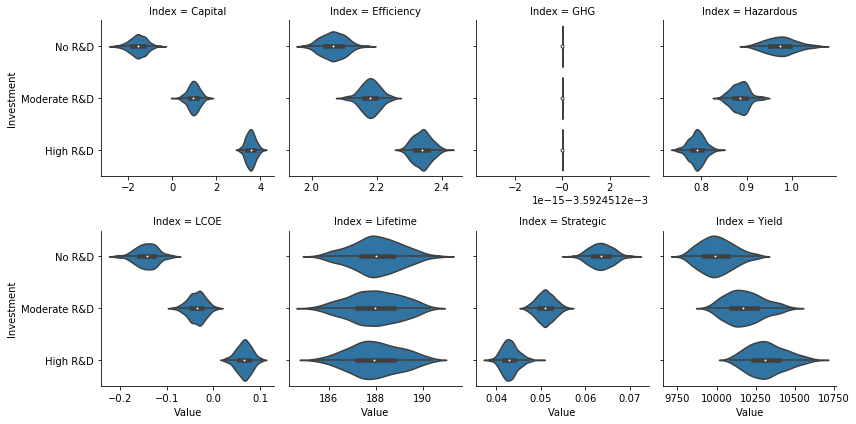

In [25]:
g = sb.FacetGrid(
    data = investment_results.summary.reset_index(),
    col = "Index",
    sharex = False,
    col_wrap = 4
)
g.map(
    sb.violinplot,
    "Value",
    "Investment",
)

## Multi-objective decision analysis.

### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [ ]:
tranche_results = investments.evaluate_tranches(designs, sample_count=50)

Display the cost of each tranche.

In [ ]:
tranche_results.amounts

Display the metrics for each tranche.

In [ ]:
tranche_results.summary

Save the results.

In [ ]:
tranche_results.amounts.to_csv("output/residential_pv_multiobjective/example-tranche-amounts.csv")
tranche_results.summary.to_csv("output/residential_pv_multiobjective/example-tranche-summary.csv")

### Fit a response surface to the results.

The response surface interpolates between the discrete set of cases provided in the expert elicitation. This allows us to study funding levels intermediate between those scenarios.

In [ ]:
evaluator = ty.Evaluator(investments.tranches, tranche_results.summary)

Here are the categories of investment and the maximum amount that could be invested in each:

In [ ]:
evaluator.max_amount

Here are the metrics and their units of measure:

In [ ]:
evaluator.units

#### Example interpolation.

Let's evaluate the case where each category is invested in at half of its maximum amount.

In [ ]:
example_investments = evaluator.max_amount / 2
example_investments

In [ ]:
evaluator.evaluate(example_investments)

Let's evaluate the mean instead of outputing the whole distribution.

In [ ]:
evaluator.evaluate_statistic(example_investments, np.mean)

Here is the standard deviation:

In [ ]:
evaluator.evaluate_statistic(example_investments, np.std)

A risk-averse decision maker might be interested in the 10% percentile:

In [ ]:
evaluator.evaluate_statistic(example_investments, lambda x: np.quantile(x, 0.1))

### ε-Constraint multiobjective optimization

In [ ]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

In order to meaningfully map the decision space, we need to know the maximum values for each of the metrics.

In [ ]:
metric_max = optimizer.max_metrics()
metric_max

#### Example optimization.

Limit spending to $3M.

In [ ]:
investment_max = 3e6

Require that the GHG reduction be at least 40 gCO2e/system and that the Labor wages not decrease.

In [ ]:
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])
metric_min

Compute the ε-constrained maximum for the LCOE.

In [ ]:
optimum = optimizer.maximize(
    "LCOE"                       ,
    total_amount = investment_max,
    min_metric   = metric_min    ,
    statistic    = np.mean       ,
)
optimum.exit_message

Here are the optimal spending levels:

In [ ]:
np.round(optimum.amounts)

Here are the three metrics at that optimum:

In [ ]:
optimum.metrics

*Thus, by putting all of the investment into Module R&D, we can expected to achieve a mean 3.75 ¢/kWh reduction in LCOE under the GHG and Labor constraints.*

It turns out that there is no solution for these constraints if we evaluate the 10th percentile of the metrics, for a risk-averse decision maker.

In [ ]:
optimum = optimizer.maximize(
    "LCOE"                       ,
    total_amount = investment_max,
    min_metric   = metric_min    ,
    statistic    = lambda x: np.quantile(x, 0.1),
)
optimum.exit_message

Let's try again, but with a less stringent set of constraints, only constraining GHG somewhat  but not Labor at all.

In [ ]:
optimum = optimizer.maximize(
    "LCOE"                                                         ,
    total_amount = investment_max                                  ,
    min_metric   = pd.Series([30], name = "Value", index = ["GHG"]),
    statistic    = lambda x: np.quantile(x, 0.1)                   ,
)
optimum.exit_message

In [ ]:
np.round(optimum.amounts)

In [ ]:
optimum.metrics

### Pareto surfaces.

##### Metrics constrained by total investment.

In [ ]:
pareto_amounts = None
for investment_max in np.arange(1e6, 9e6, 0.5e6):
    metrics = optimizer.max_metrics(total_amount = investment_max)
    pareto_amounts = pd.DataFrame(
        [metrics.values]                                         ,
        columns = metrics.index.values                           ,
        index   = pd.Index([investment_max / 1e6], name = "Investment [M$]"),
    ).append(pareto_amounts)
pareto_amounts

In [ ]:
sb.relplot(
    x         = "Investment [M$]",
    y         = "Value"          ,
    col       = "Metric"         ,
    kind      = "line"           ,
    facet_kws = {'sharey': False},
    data      = pareto_amounts.reset_index().melt(id_vars = "Investment [M$]", var_name = "Metric", value_name = "Value")
)

*We see that the LCOE metric saturates more slowly than the GHG and Labor ones.*

##### GHG vs LCOE, constrained by total investment.

In [ ]:
investment_max = 3
pareto_ghg_lcoe = None
for lcoe_min in 0.95 * np.arange(0.5, 0.9, 0.05) * pareto_amounts.loc[investment_max, "LCOE"]:
    optimum = optimizer.maximize(
        "GHG",
        max_amount   = pd.Series([0.9e6, 3.0e6, 1.0e6], name = "Amount", index = ["BoS R&D", "Inverter R&D", "Module R&D"]),
        total_amount = investment_max * 1e6                                 ,
        min_metric   = pd.Series([lcoe_min], name = "Value", index = ["LCOE"]),
    )
    pareto_ghg_lcoe = pd.DataFrame(
        [[investment_max, lcoe_min, optimum.metrics["LCOE"], optimum.metrics["GHG"], optimum.exit_message]],
        columns = ["Investment [M$]", "LCOE (min)", "LCOE", "GHG", "Result"]                               ,
    ).append(pareto_ghg_lcoe)
pareto_ghg_lcoe = pareto_ghg_lcoe.set_index(["Investment [M$]", "LCOE (min)"])
pareto_ghg_lcoe

In [ ]:
sb.relplot(
    x = "LCOE",
    y = "GHG",
    kind = "scatter",
    data = pareto_ghg_lcoe#[pareto_ghg_lcoe.Result == "Optimization terminated successfully."]
)

*The three types of investment are too decoupled to make an interesting pareto frontier, and we also need a better solver if we want to push to lower right.*

## Run the interactive explorer for the decision space.

<font color="red">Make sure the the `tk` package is installed on your machine.</font> Here is the Anaconda link: https://anaconda.org/anaconda/tk.

In [ ]:
w = ty.DecisionWindow(evaluator)
w.mainloop()

A new window should open that looks like the image below. Moving the sliders will cause a recomputation of the boxplots.

In [ ]:
Image("residential_pv_multiobjective_gui.png")